In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 3795506
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g, load_360=True)

teams = list(df_events['team_name'].unique())
teams_id = list(df_events['team_id'].unique())

df_shots = df_events[(df_events["type_name"] == "Shot") & (df_events["period_id"] < 5)].reset_index(drop=True)

In [3]:
df = api.games(competition_id=55, season_id=43)
df[(df["home_team_id"] == 914) | (df["away_team_id"] == 914)].game_id.unique()

array([3788766, 3795220, 3788754, 3788741, 3795506, 3794685, 3795107],
      dtype=int64)

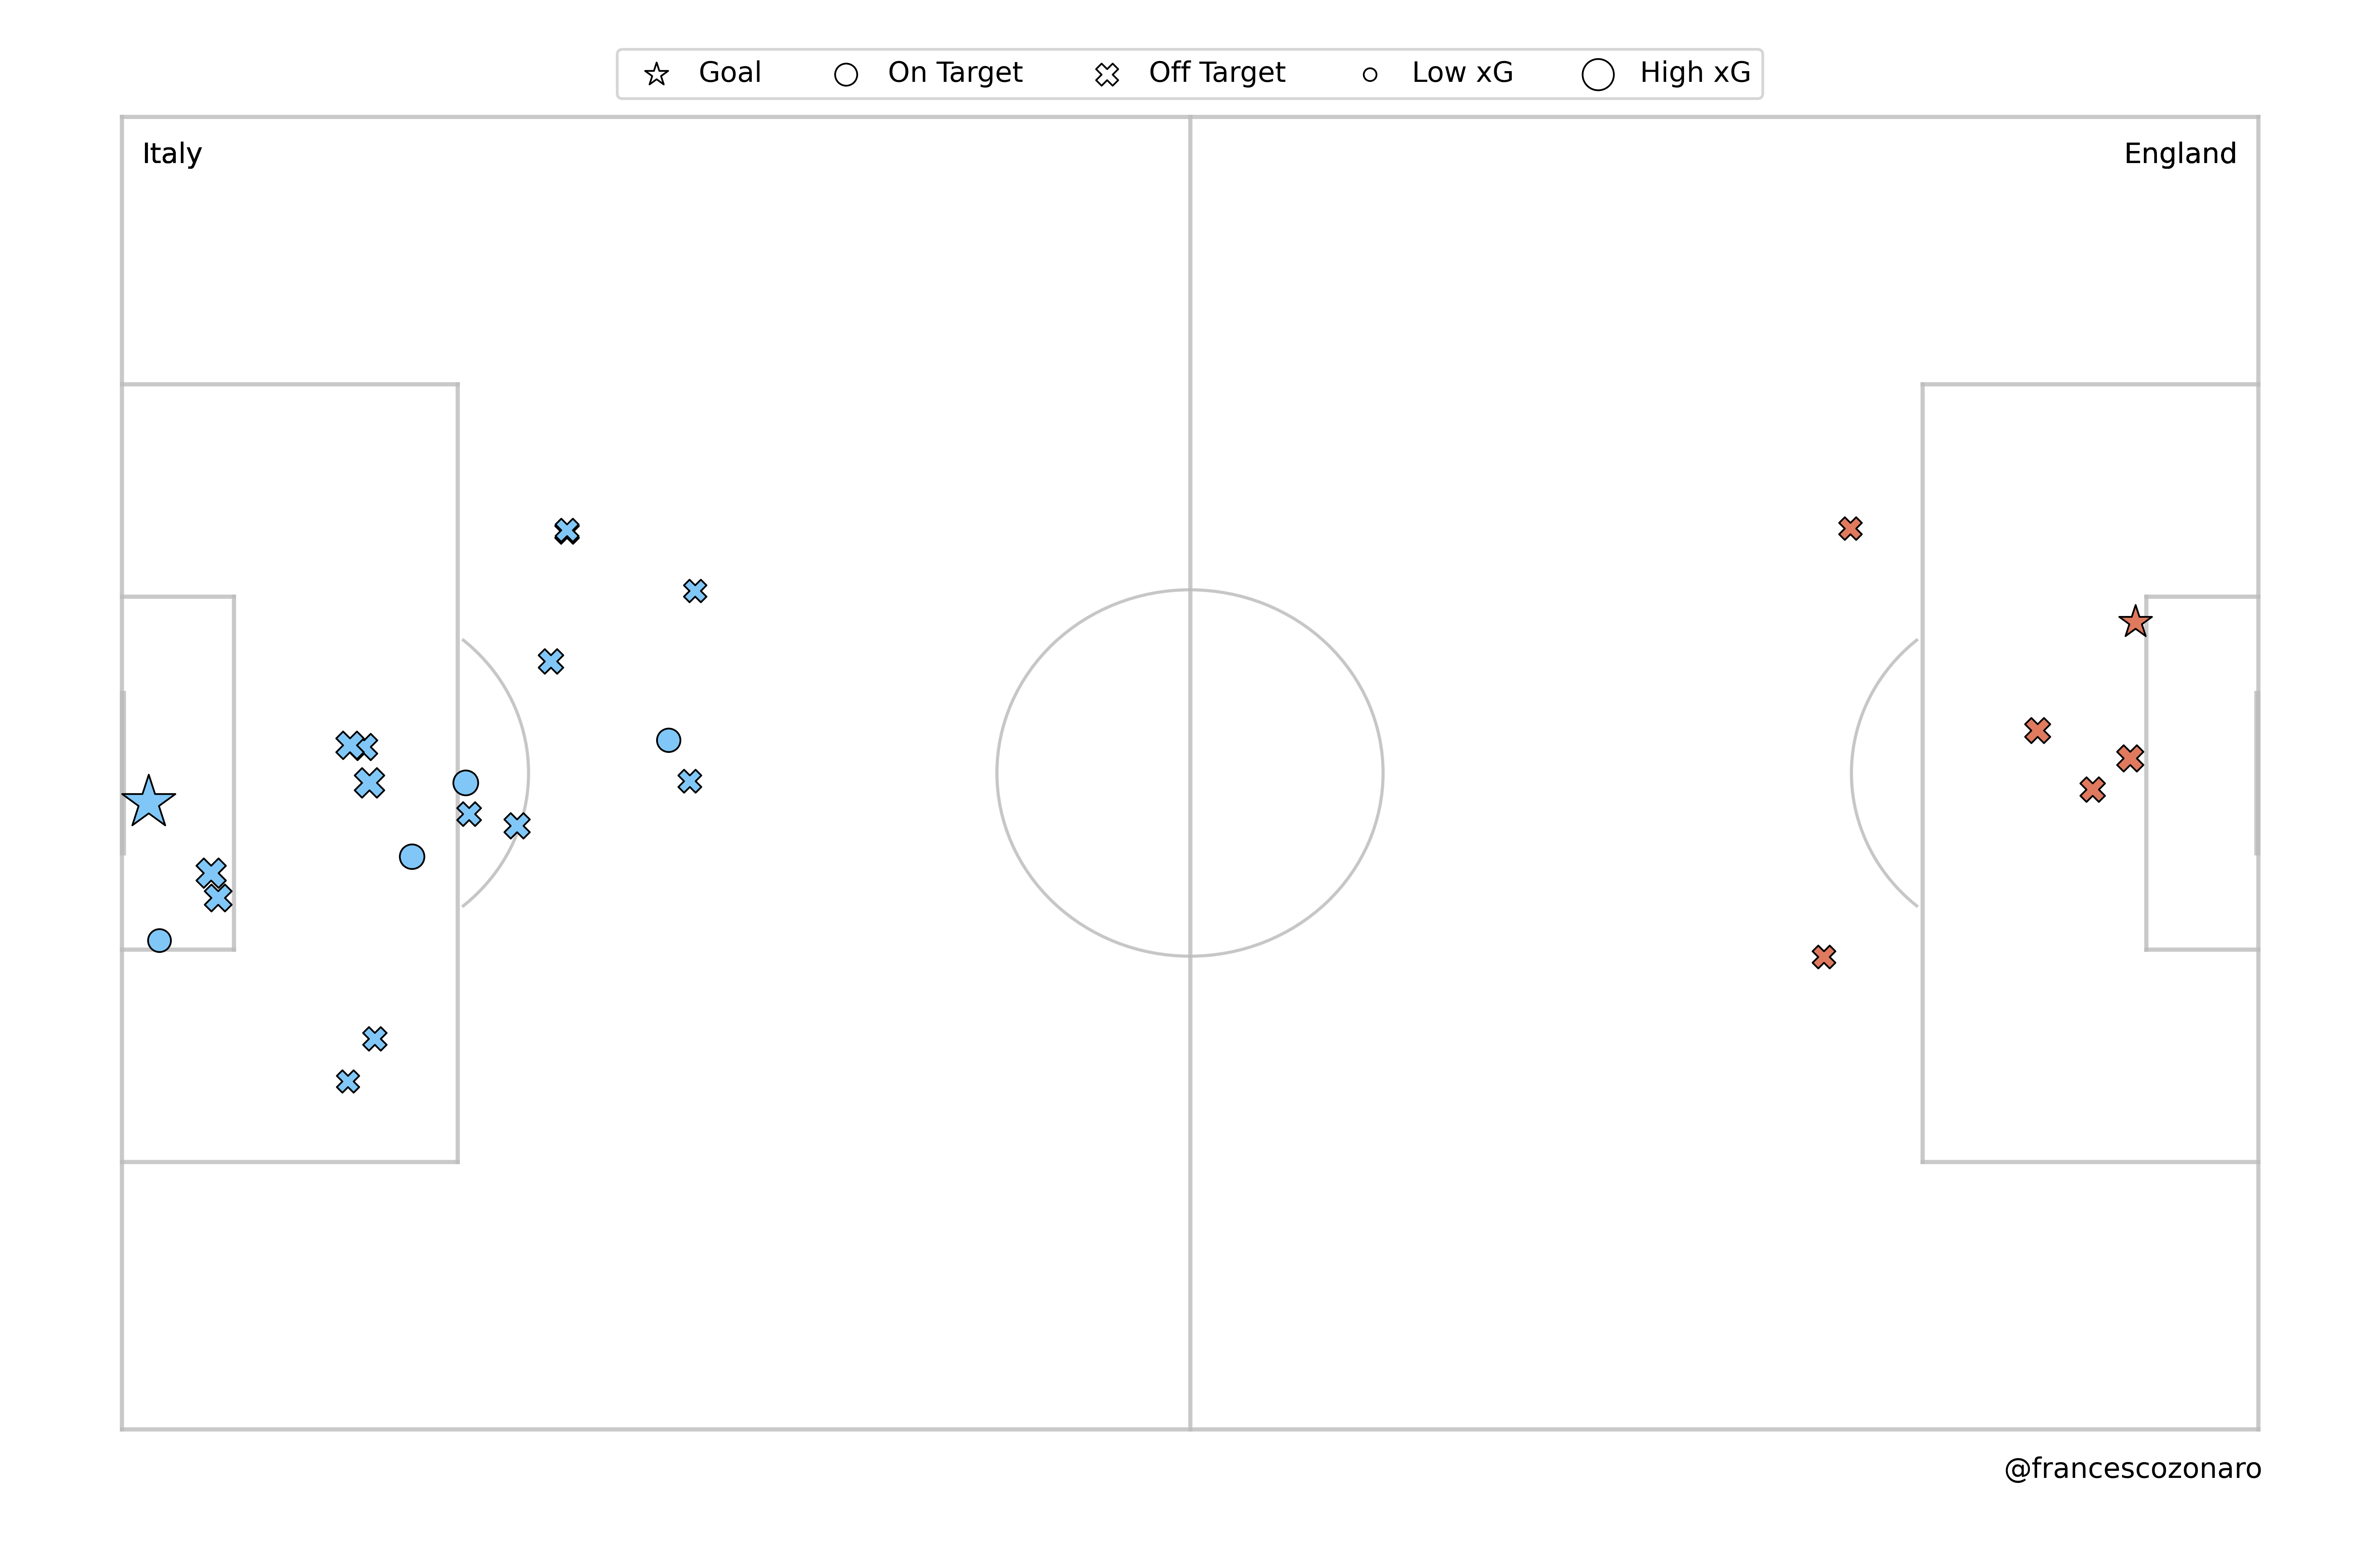

In [4]:
import statsbombplot as sbp

sbp.events.draw_shotmap(df_shots, "shotmap", teams_id[0])